In [11]:
# device = 'K0303'
# active_power_variable = 'active_power'
path_base_r_string = r'D:\OneDrive - CELSIA S.A E.S.P'

%load_ext autoreload
%autoreload 2
import warnings
# warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# this cell enables project path relative imports
import sys
from pathlib import Path
path_base = Path(path_base_r_string)
project_path = path_base / 'Proyectos' / 'Eficiencia_Energetica' / 'Bancolombia' / 'Experimental'
sys.path.append(str(project_path))

In [13]:
import pandas as pd
import numpy as np
import datetime as dt
import pytz

# import researchpy as rp
# import scipy.stats as stats

from matplotlib import pyplot as plt

import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px


import config as cfg
import library_esenttia as Esenttia

pio.renderers.default = "notebook"
pio.templates.default = "plotly_white"

lst_big_colors = cfg.lst_primary_pallete + cfg.lst_secondary_palette
max_iter = 10

In [14]:
df = pd.read_pickle(project_path / 'tools' / 'data_monthly.pkl')
df = df.reset_index().sort_values(by=['datetime', 'variable', 'device'])
df = df.drop_duplicates(subset=['datetime', 'variable', 'device'], keep='first')
df = df.set_index('datetime')

In [15]:
df_cons = df[df['variable'].isin(['front-consumo-activa','aa-consumo-activa','ilu-consumo-activa'])]
df_energy = Esenttia.recover_energy_from_consumption(df_cons)
df_energy_repaired = Esenttia.repair_monotonic_increasing_variable(df_energy, max_iter=10, tolerance=0.05, trust_gaps=False)

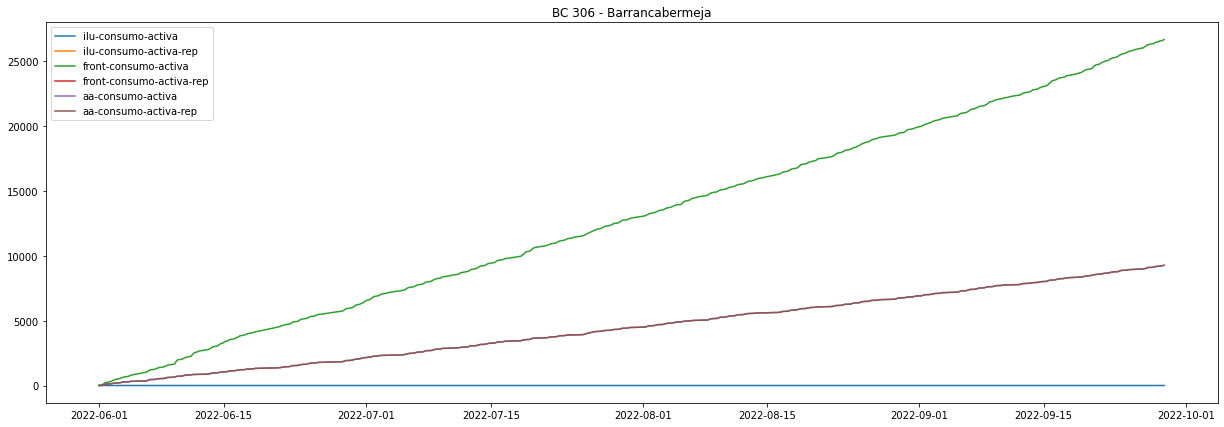

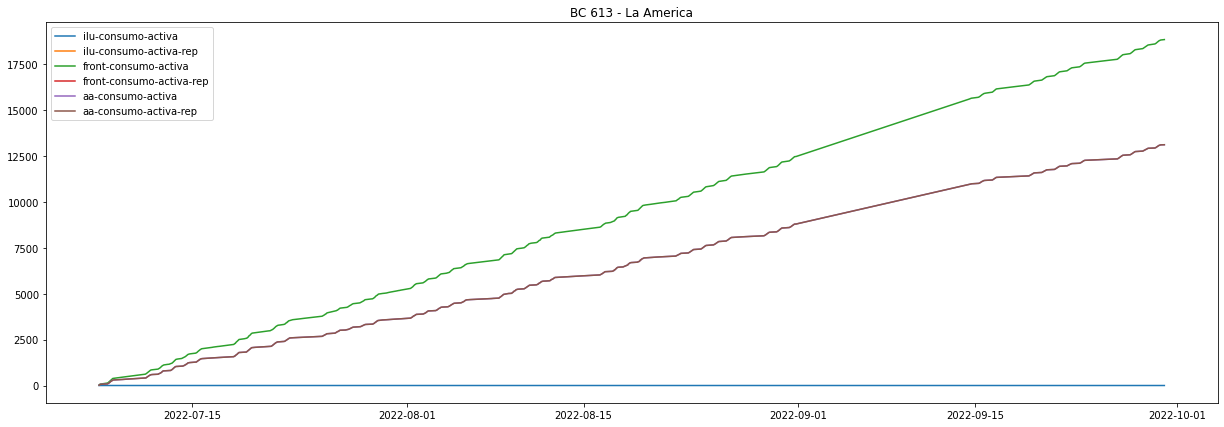

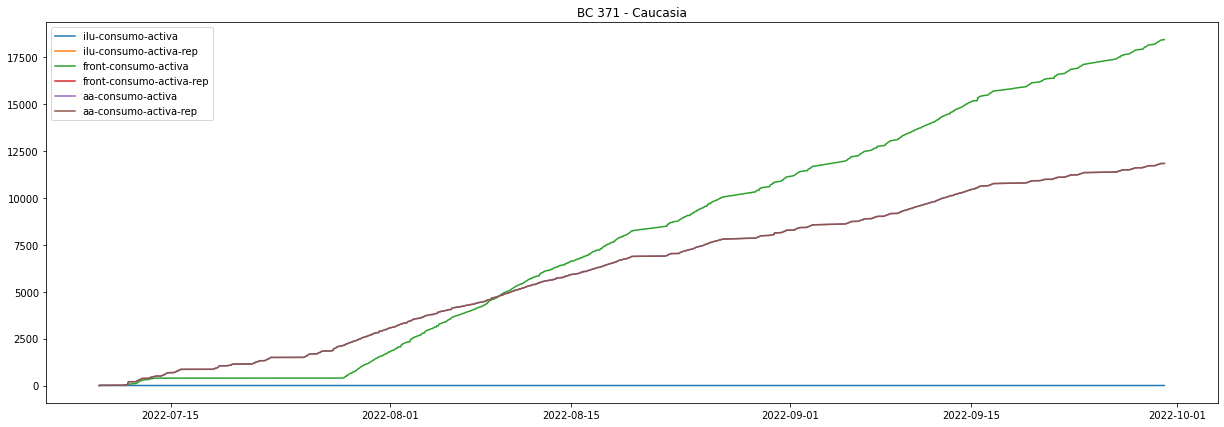

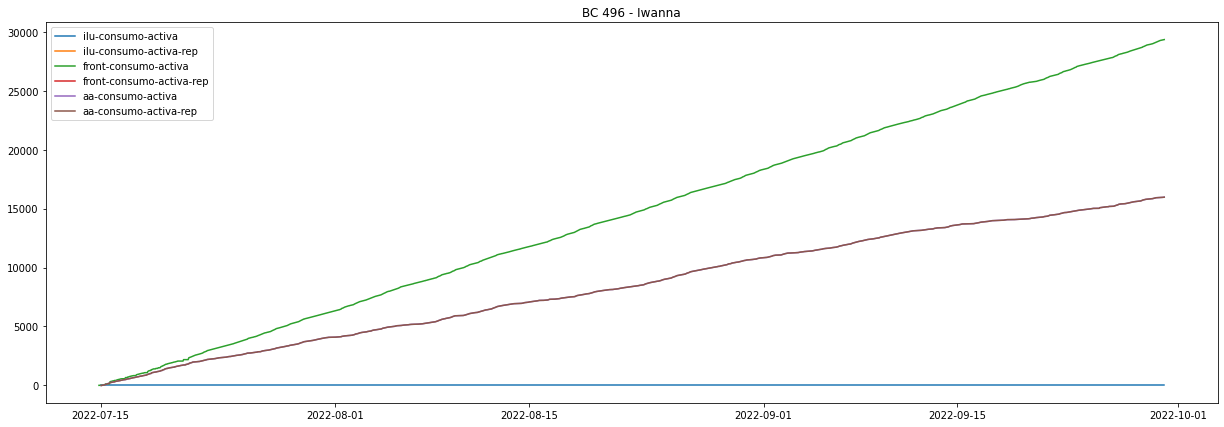

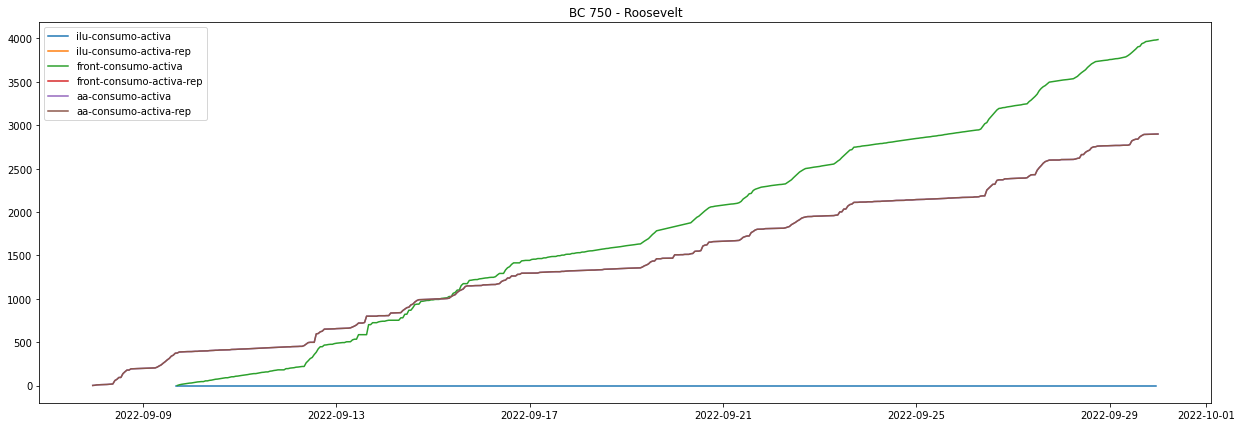

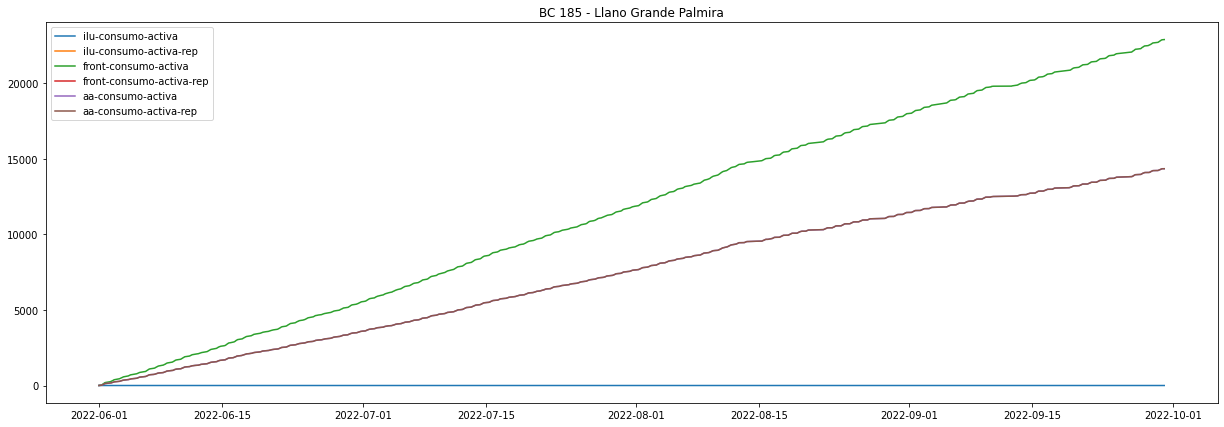

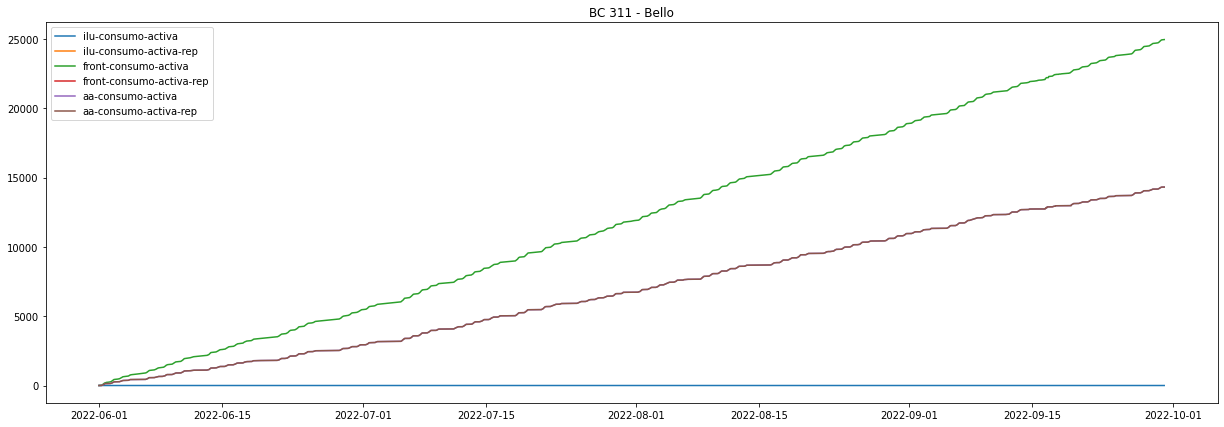

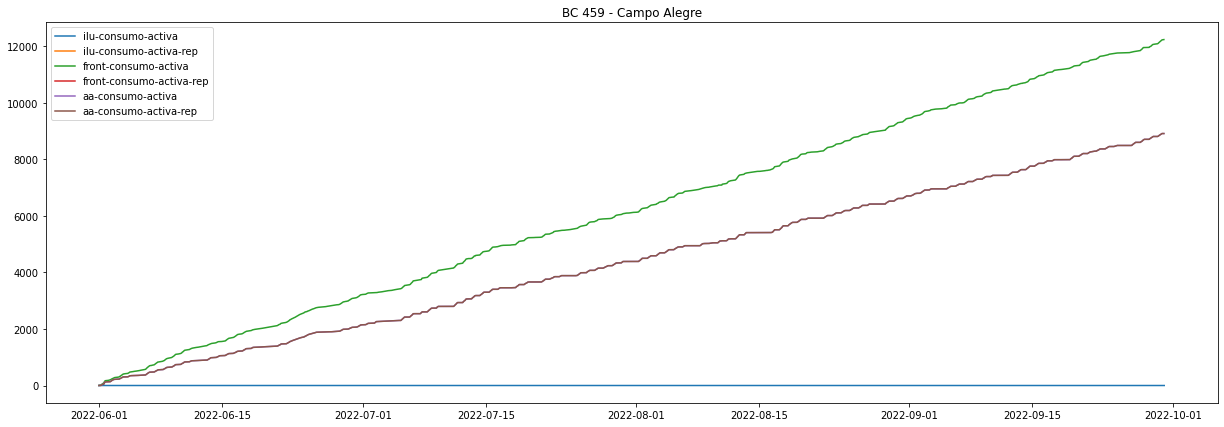

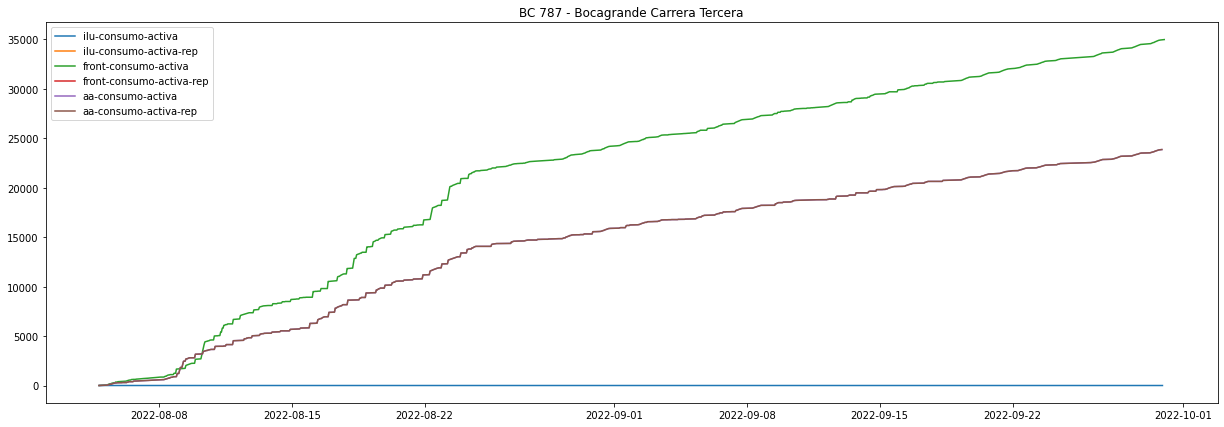

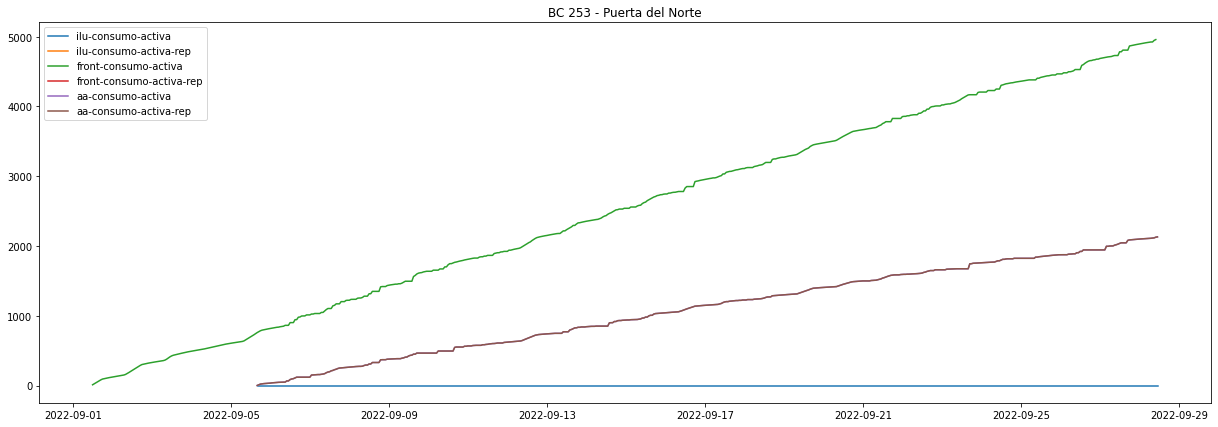

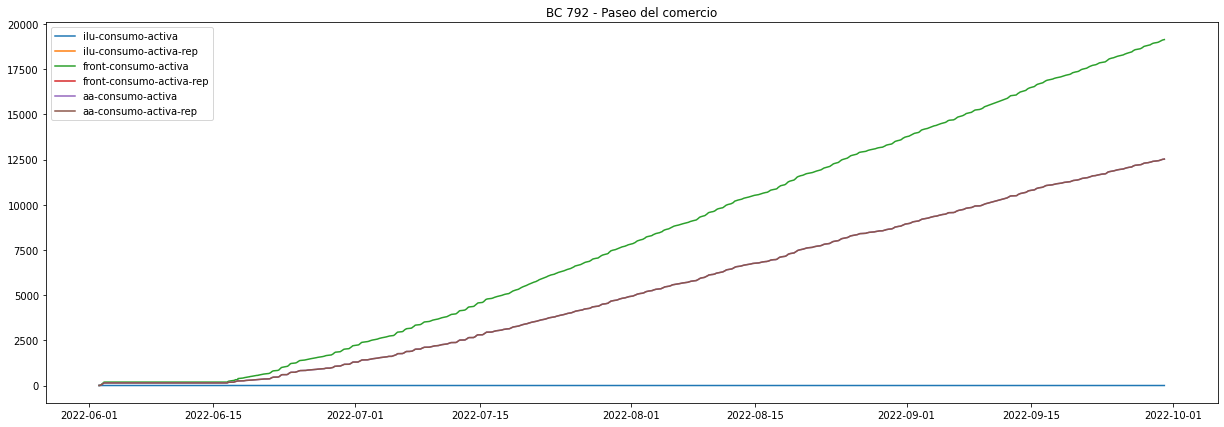

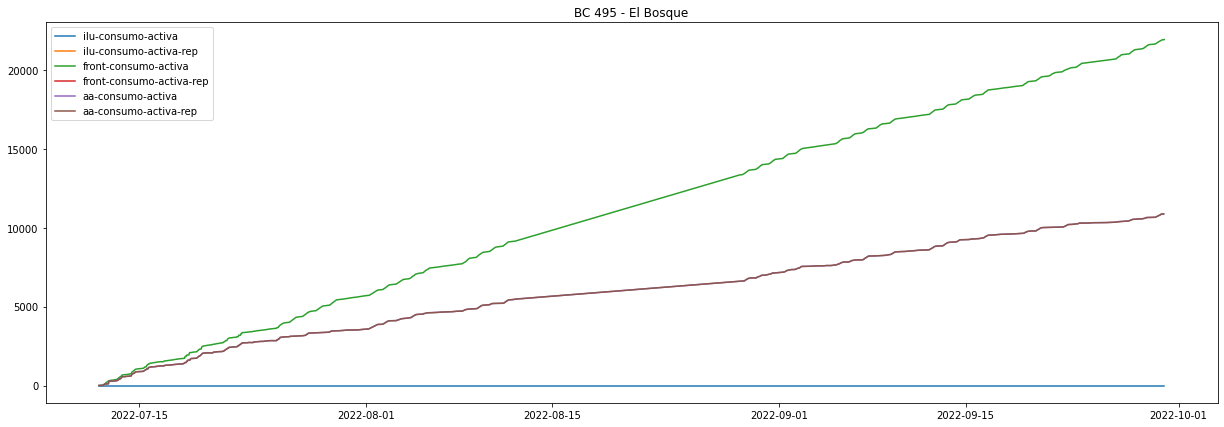

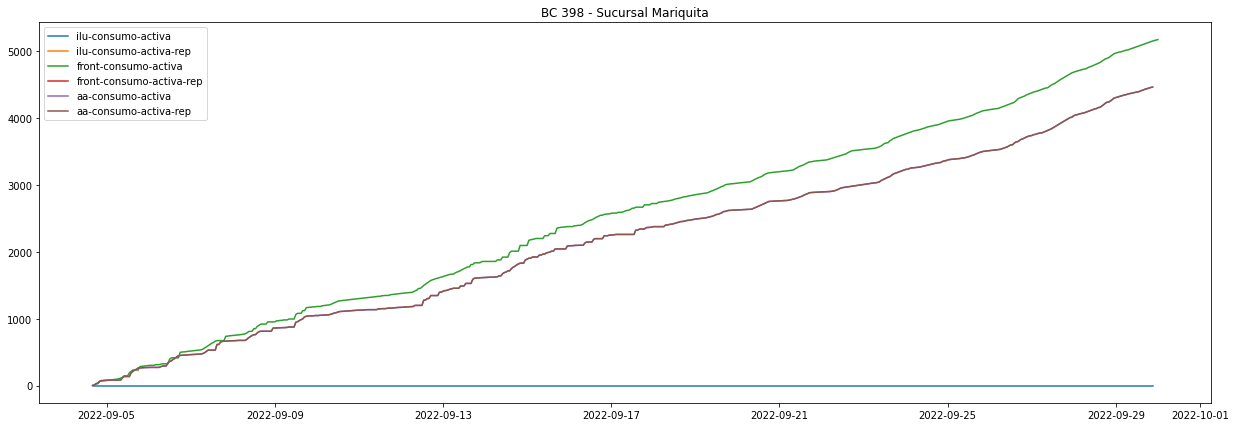

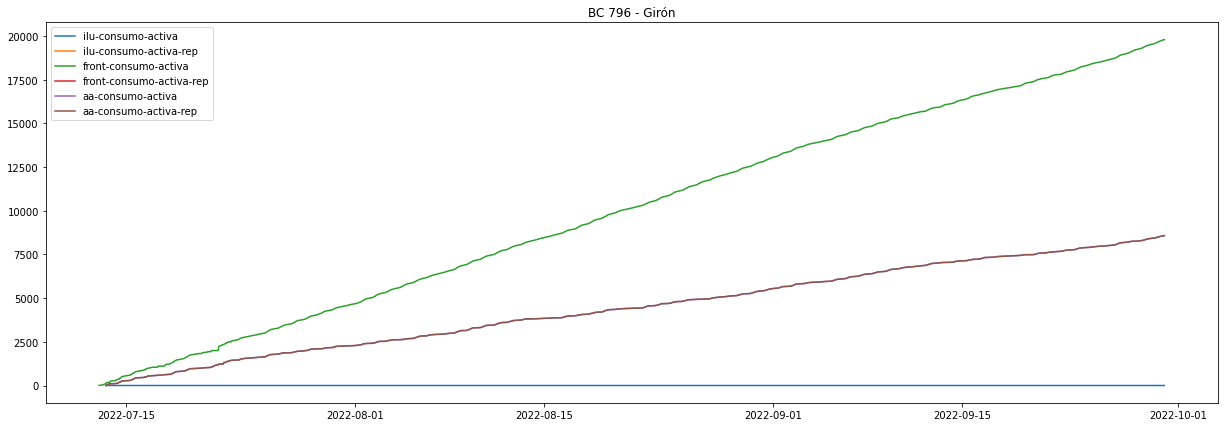

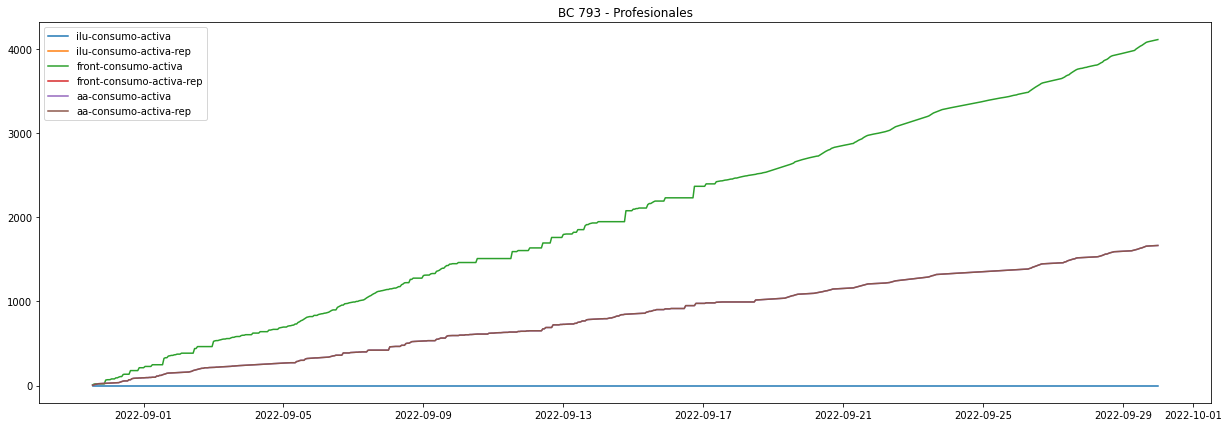

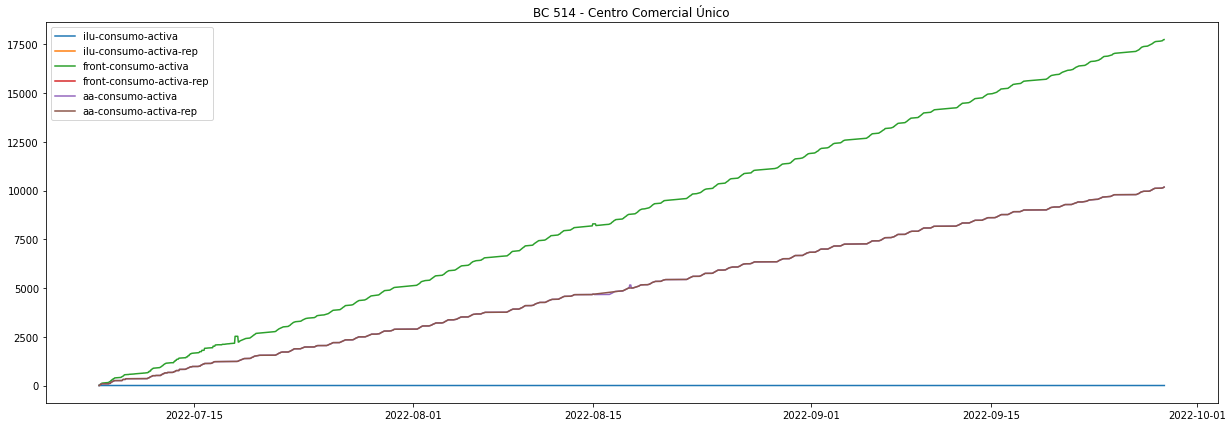

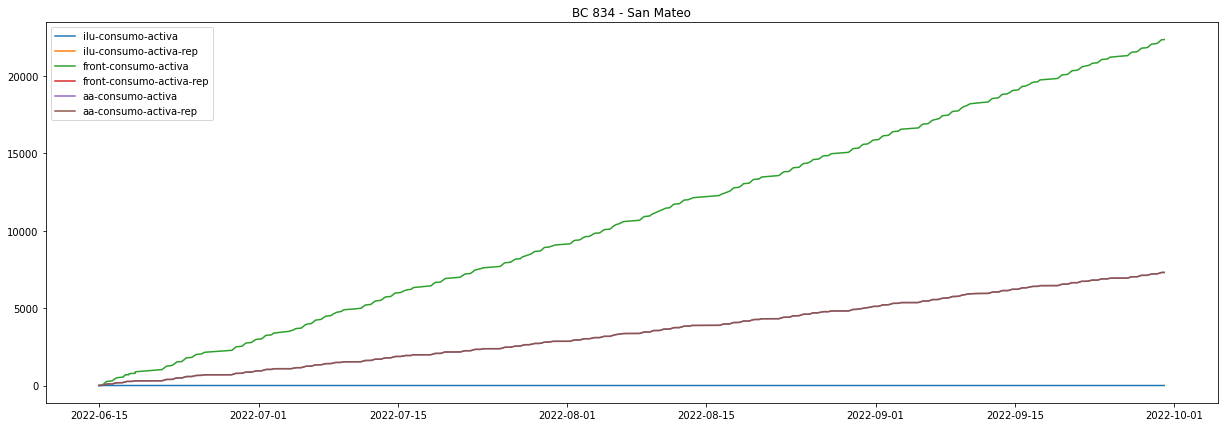

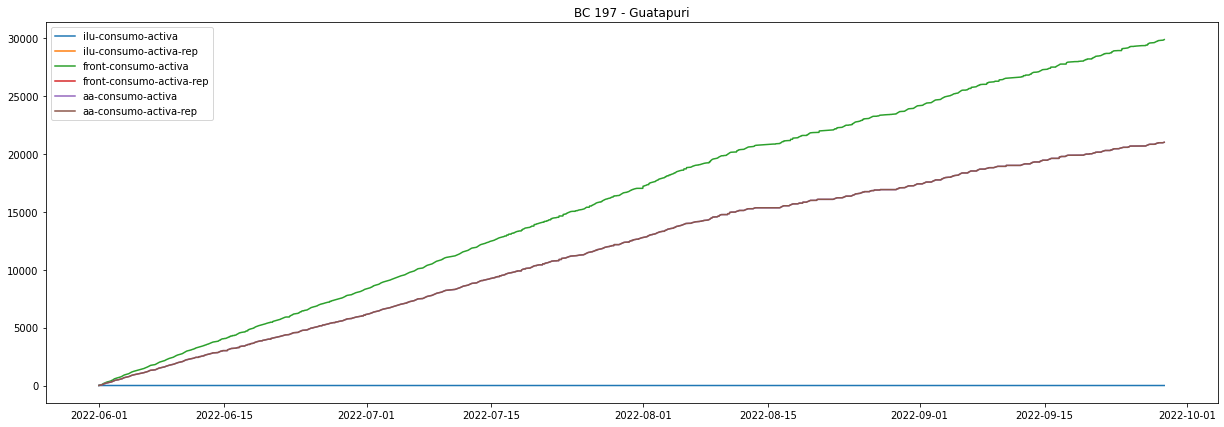

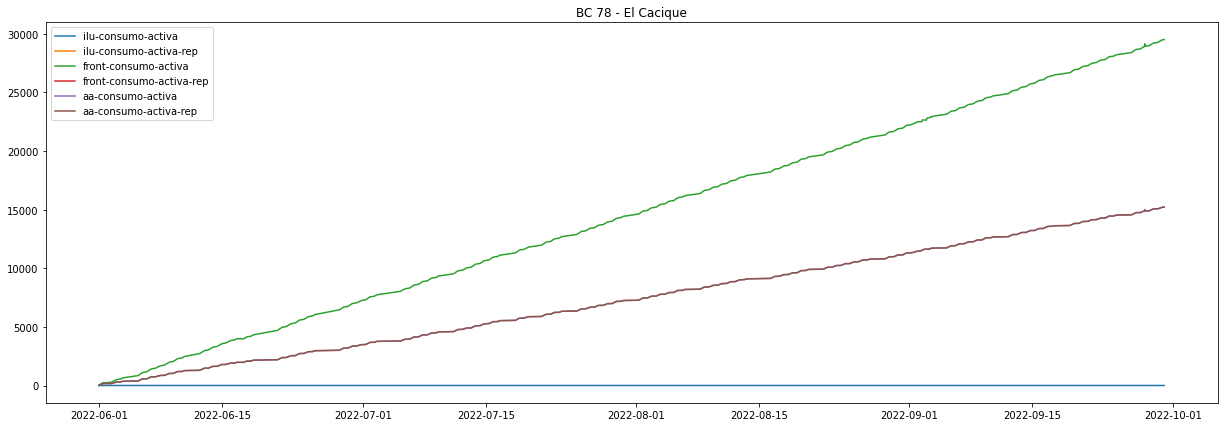

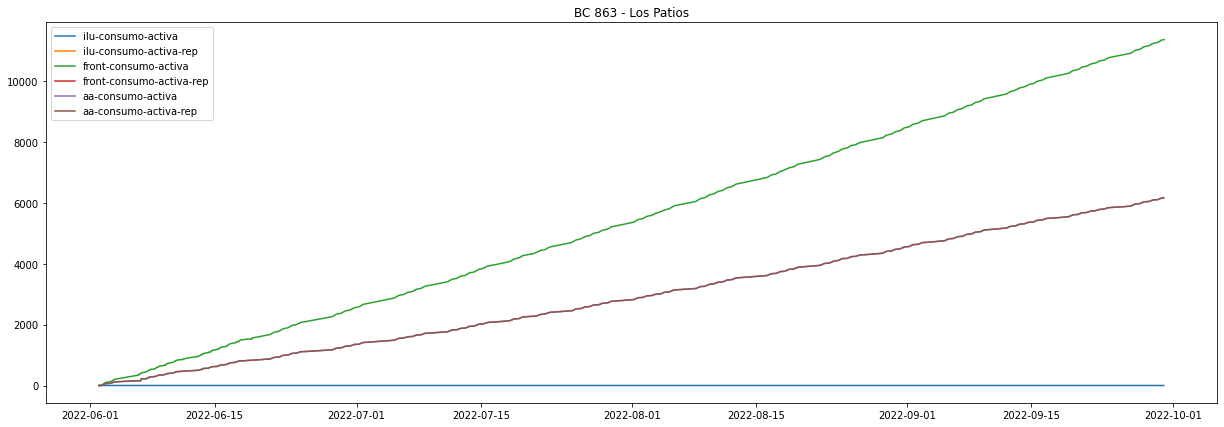

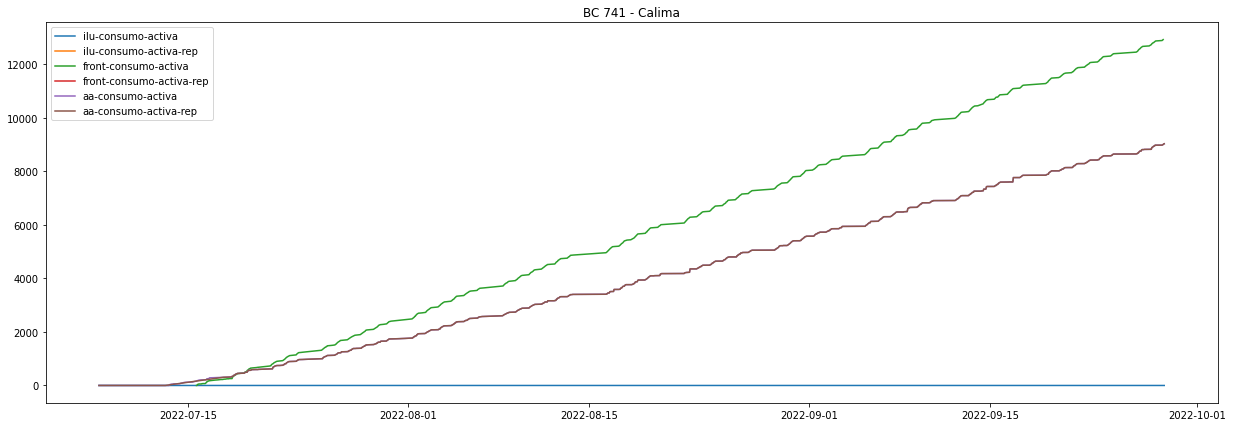

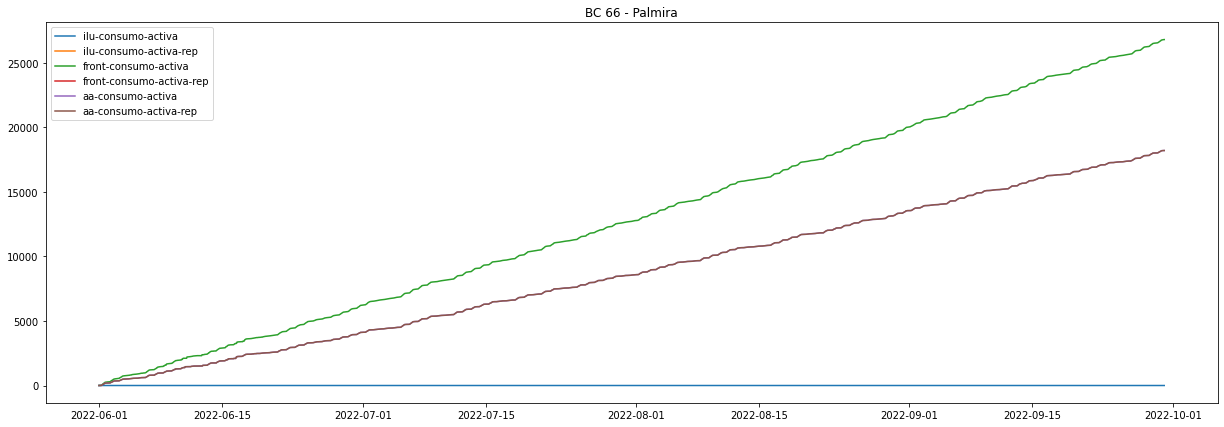

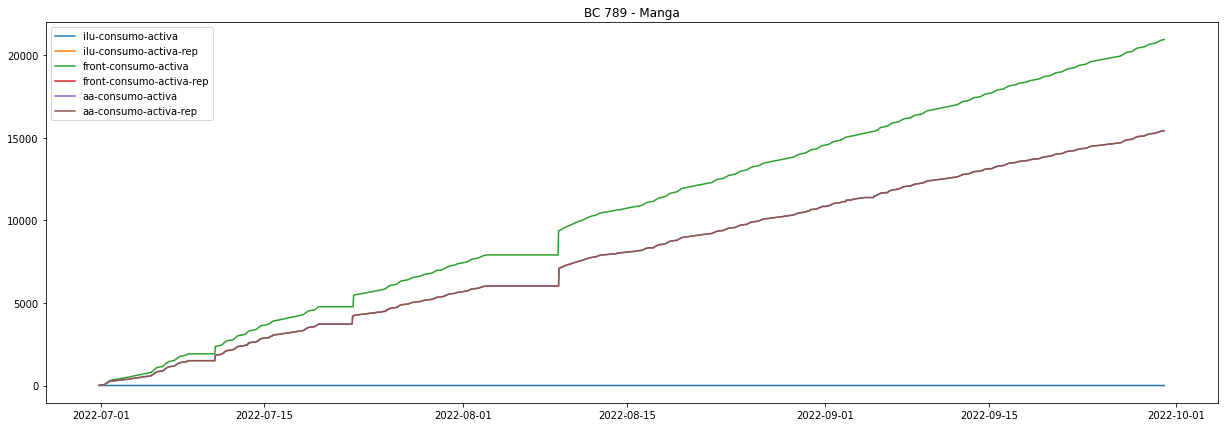

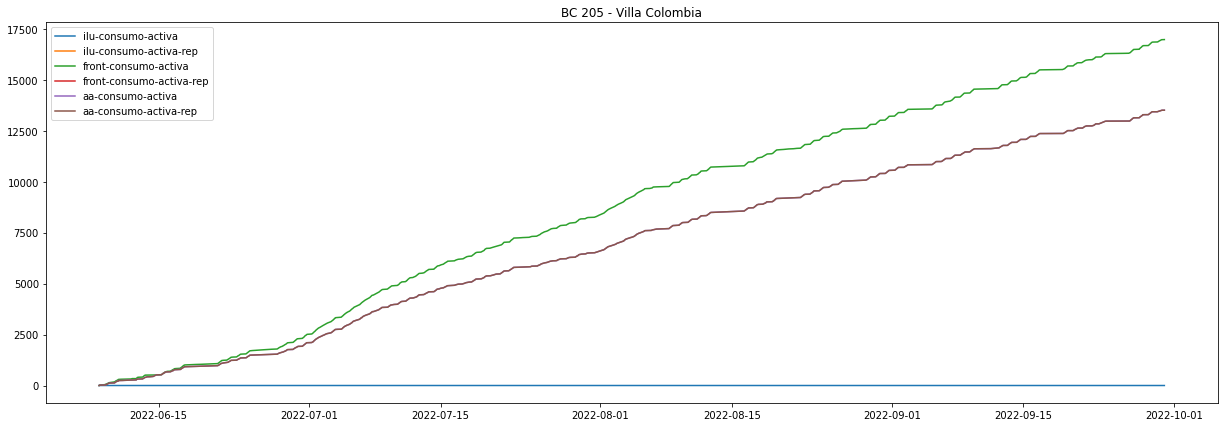

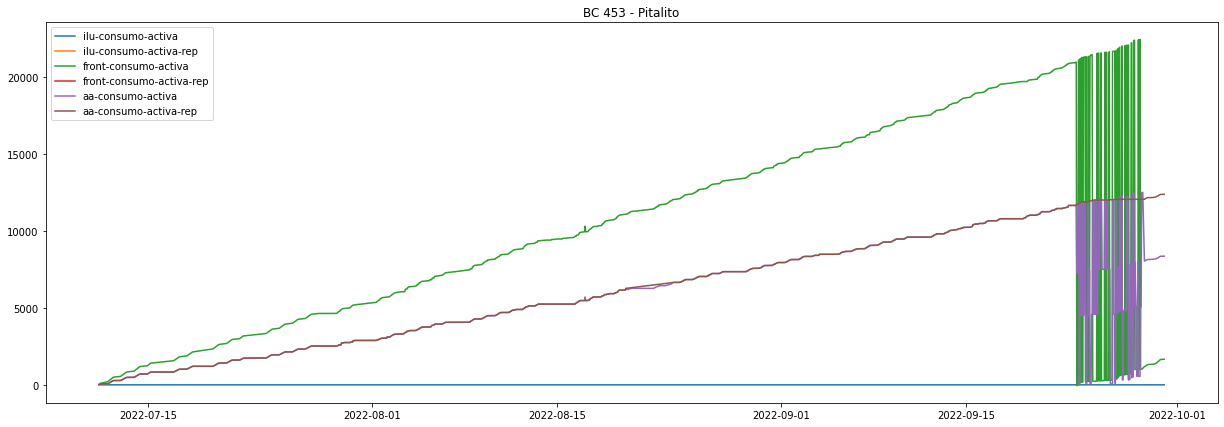

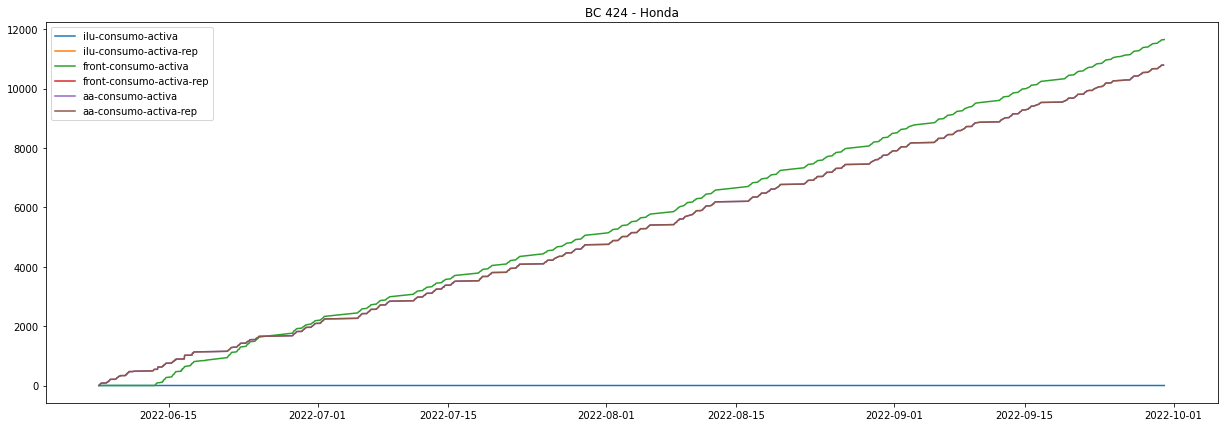

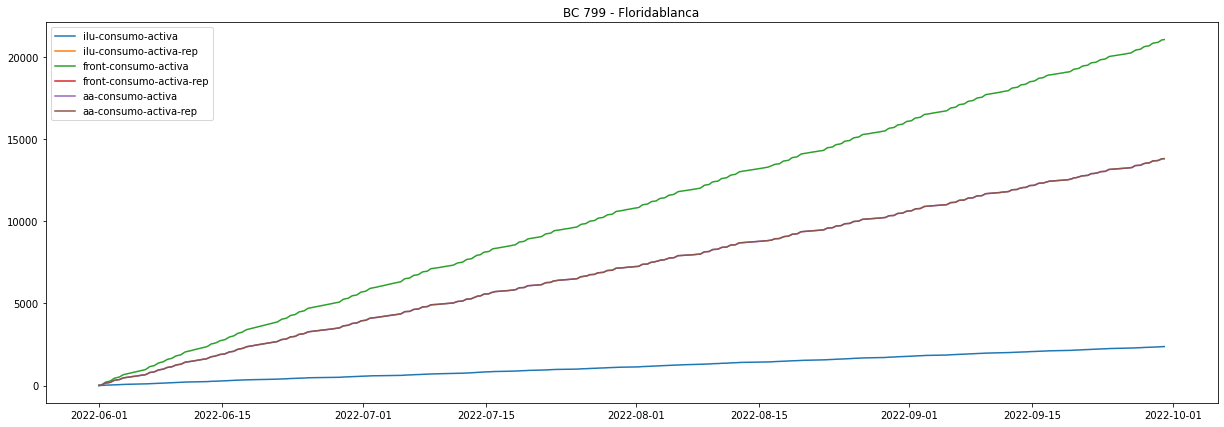

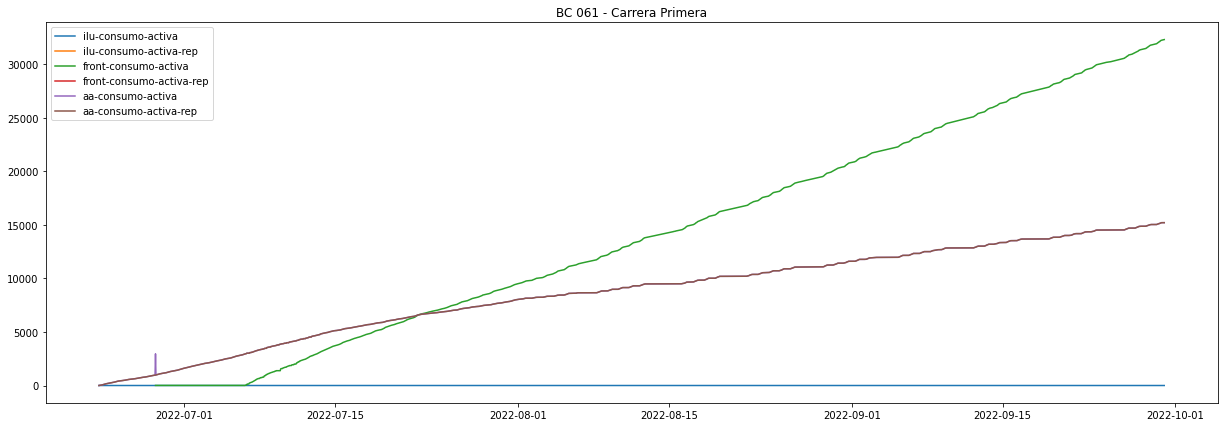

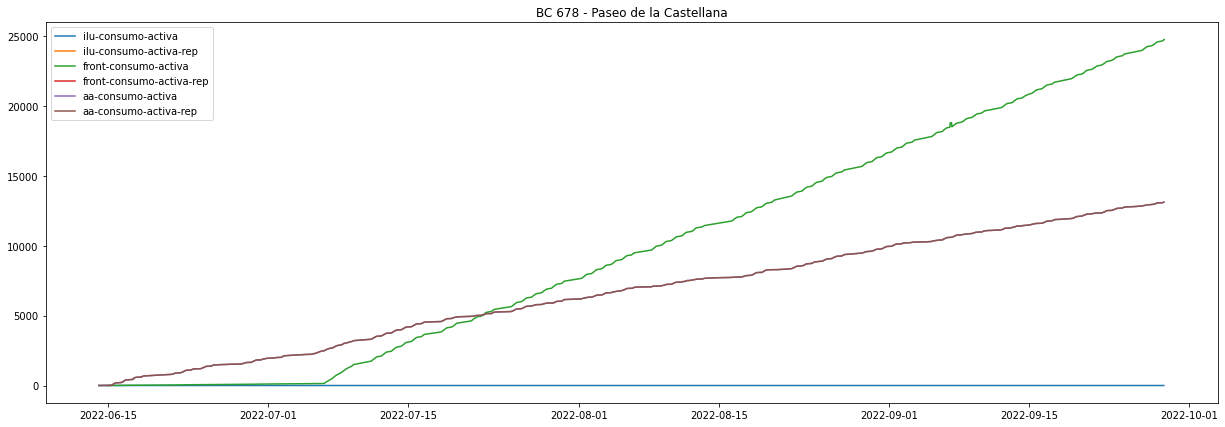

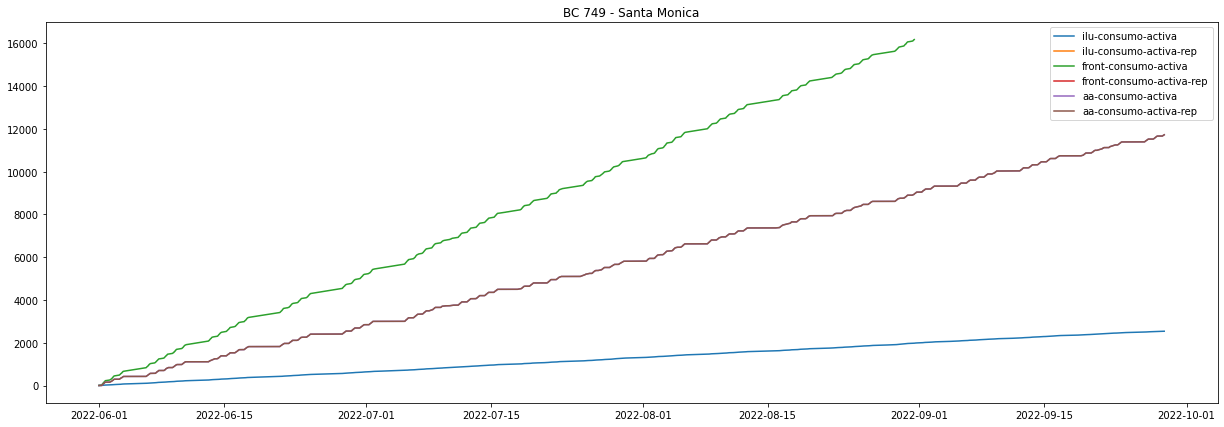

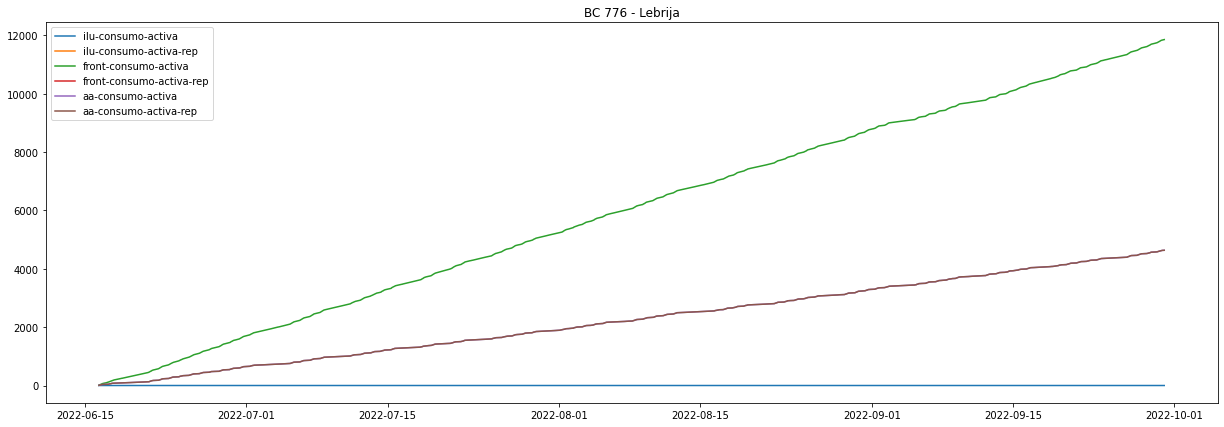

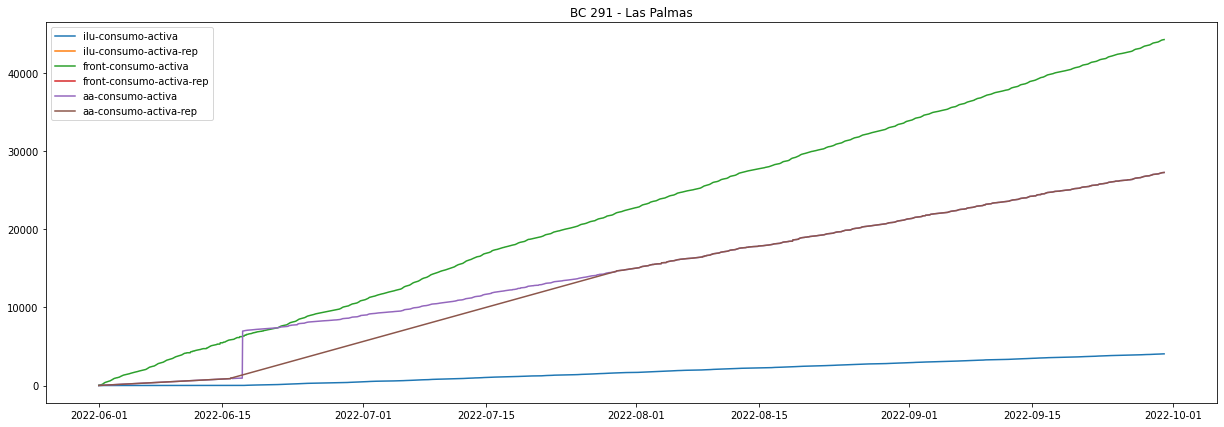

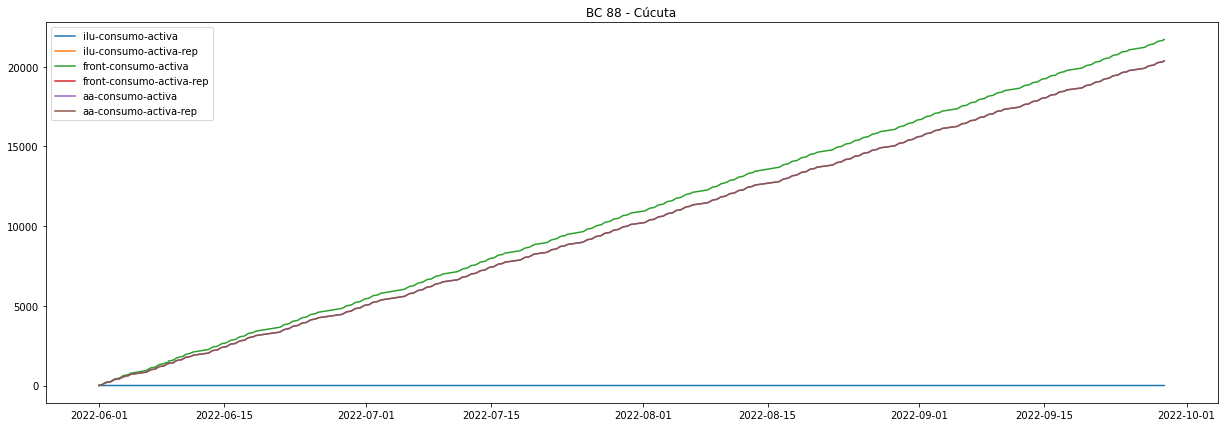

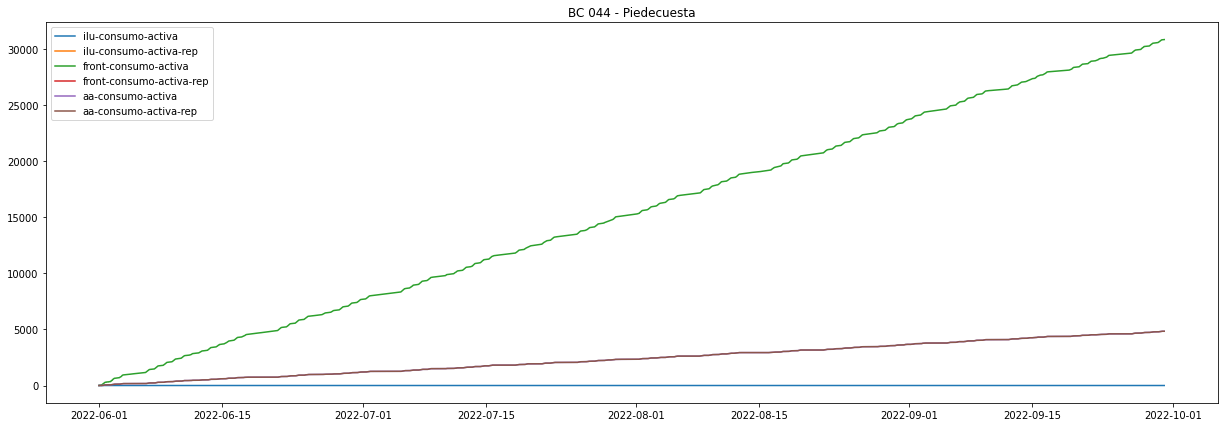

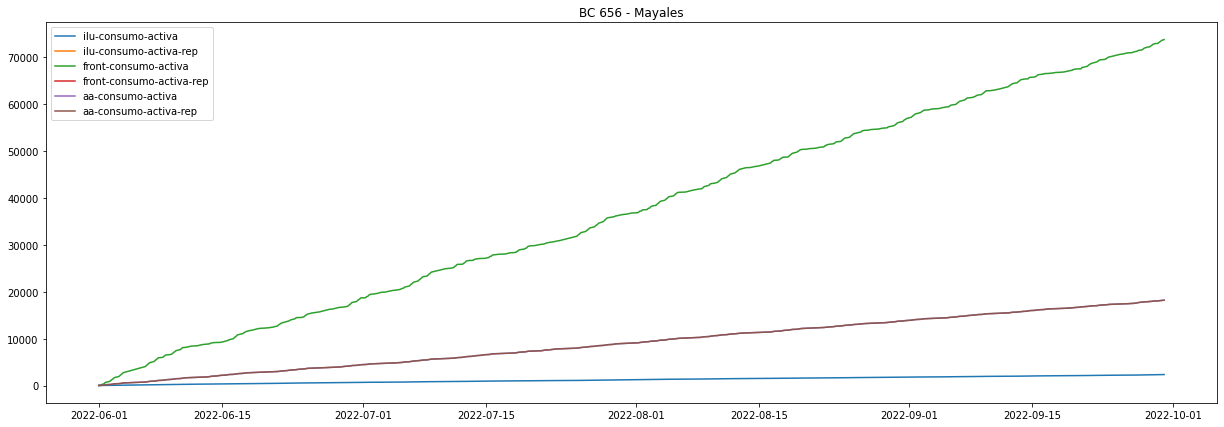

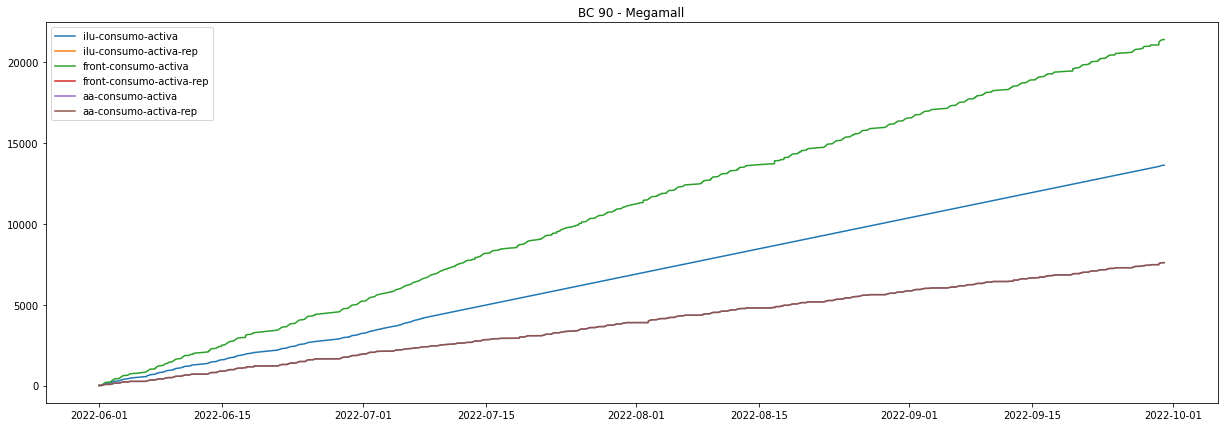

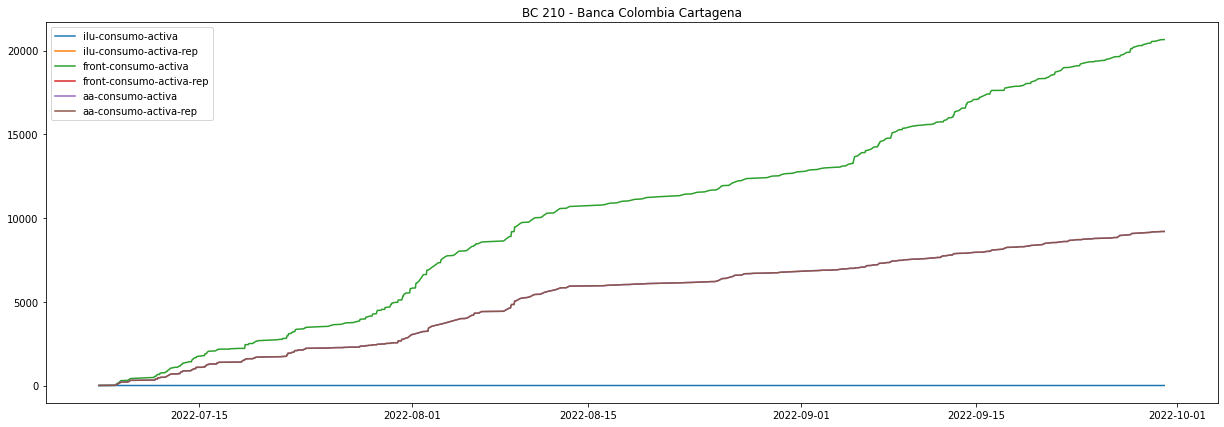

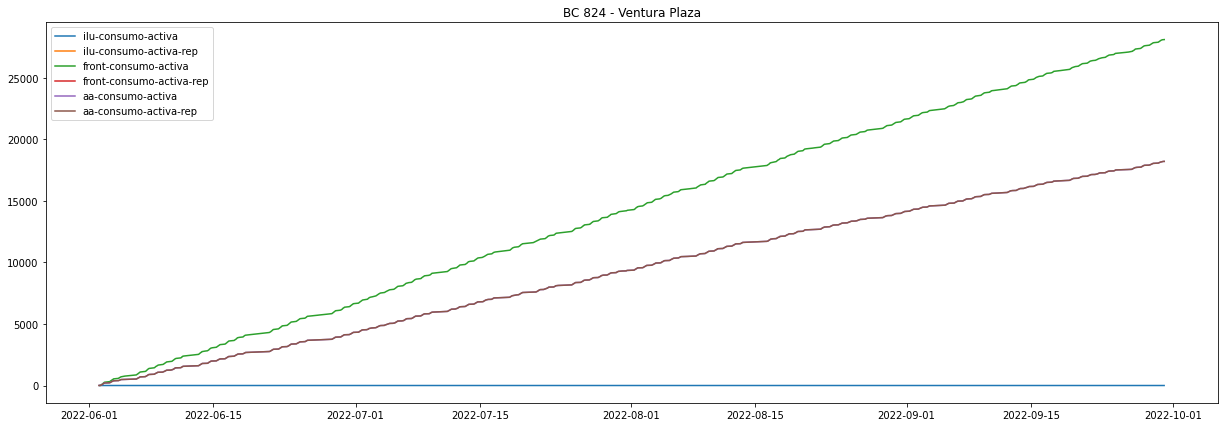

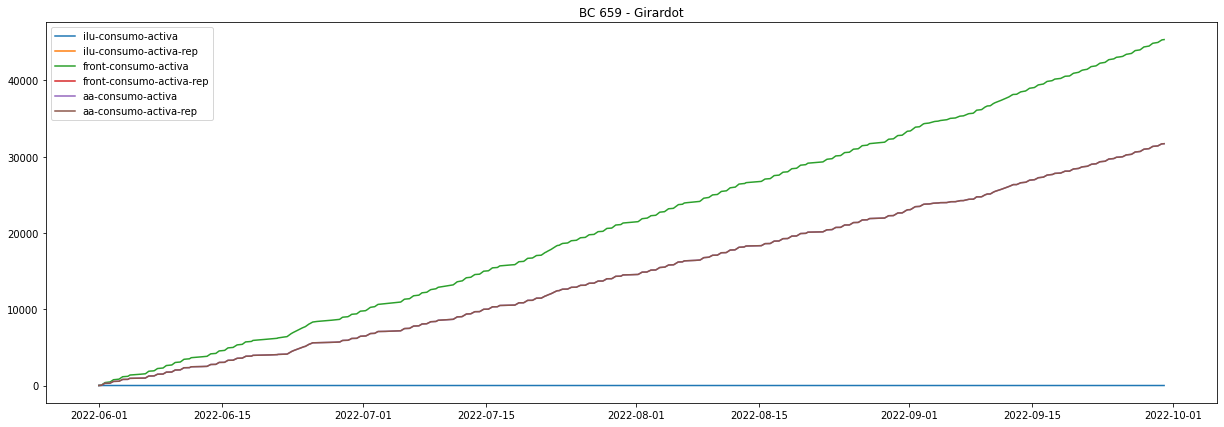

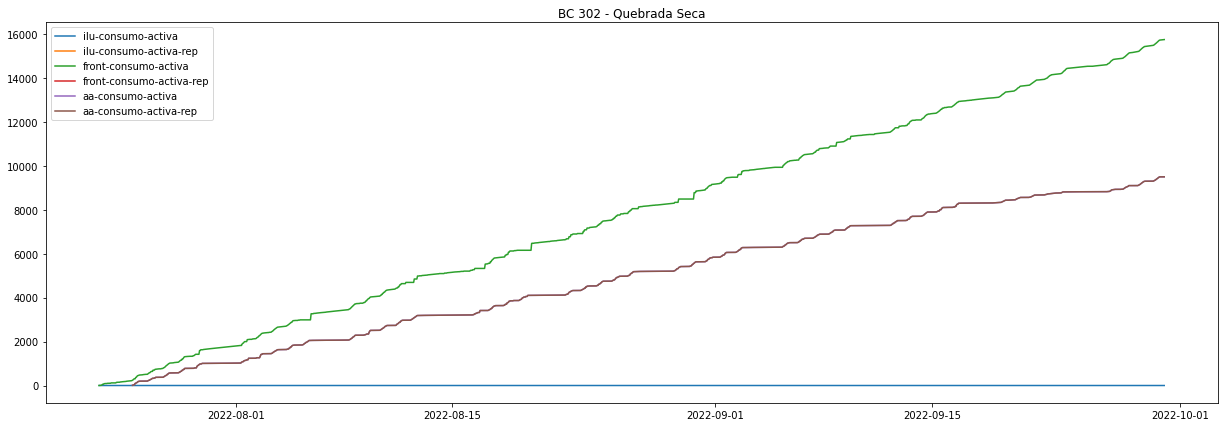

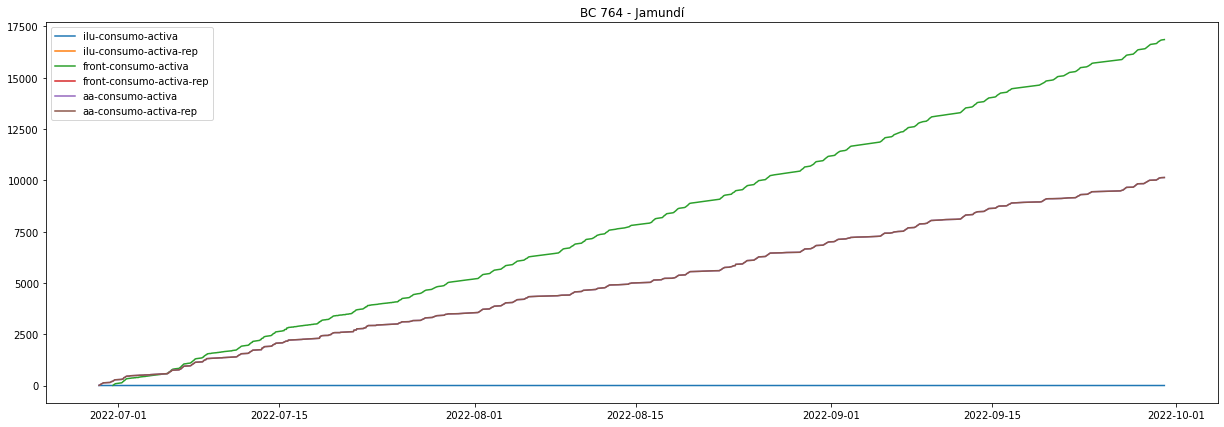

In [18]:
for device in set(df_energy['device']):
    df_energy_device = df_energy.query("device == @device")
    df_energy_repaired_device = df_energy_repaired.query("device == @device")

    device_name = df_energy_device['device_name'][0]

    plt.figure(figsize=(21,7))
    for variable in set(df_energy_device['variable']):
        df_energy_device_variable = df_energy_device.query("variable == @variable")
        df_energy_repaired_device_variable = df_energy_repaired_device.query("variable == @variable")



        plt.plot(df_energy_device_variable['value'], label=variable)
        plt.plot(df_energy_repaired_device_variable['value'], label=f"{variable}-rep")

    plt.title(device_name)
    plt.legend()
    plt.show()

In [ ]:
df = df.drop(columns=['name'])
df = df.rename(columns={'load':'device'})

# Sorting in this order will show the first oldest datum in the head
# and the last datum in the tail, while also giving a glimpse into
# the data sampling rate by prioritising 'variable' over 'device'
df = df.reset_index().sort_values(by=['datetime', 'variable', 'device'])
df = df.drop_duplicates(subset=['datetime', 'variable', 'device'], keep='first')
df = df.set_index('datetime')

df_energy = df[(df['variable'] == 'active_energy_delivered')]

In [ ]:
df_repaired

In [ ]:
device = '01P010AM01'
df_device = df_repaired.query("device == @device & variable == 'active_power'").copy()
df_device_energy = df_device.query("variable == 'active_energy_delivered'")
df_device_power = df_device.query("variable == 'active_power'")

In [ ]:
df_device_power['value'].plot()

In [ ]:
df_repaired.to_pickle("data/data_long_repaired.pkl")